# Machine Learning Exercises 9  
LDA and QDA are motivated by minimising the misclassification error (the expected loss under 0-1 loss)
in a generative model where the class-conditionals are Gaussian (LDA: same variance across classes, QDA:
different variance).  

For a given value of the feature, $x$, the classifier works by computing $K$ discriminant functions
$(\delta_1(x),\dots,\delta_K(x))$ and classifying to the class that has the highest value.  

The expression for each $\delta_k(x)$ is the quadratic expressions we derived for LDA and QDA jointly in
lectures:
$$
\begin{align}
\delta_{k}(x)=-\frac{1}{2\sigma_{k}^{2}}x^{2}+\frac{\mu_{k}}{\sigma_{k}^{2}}x-\frac{\mu_{k}^{2}}{2\sigma_{k}^{2}}-\frac{1}{2}\log(2\pi\sigma_{k}^{2})+\log\pi_{k}.
\end{align}
$$
In the case of LDA this reduces quite a bit since $\sigma_{k}^{2}=\sigma^{2}$ is the same for all classes.  

To evaluate the discriminant functions, we need the Gaussian parameters and also the class probabilities. When these parameters are unknown, we estimate them from training data.


**Exercise 1.** In (1), show how this expression reduces in the case of LDA where all classes have the same
variance. Explain how some terms can be eliminated and therefore that we can use *linear* rather than
quadratic discriminants.

*Solution*: 
$$
\begin{align*}
\delta_{k}(x)&=-\frac{1}{2\sigma_{k}^{2}}x^{2}+\frac{\mu_{k}}{\sigma_{k}^{2}}x-\frac{\mu_{k}^{2}}{2\sigma_{k}^{2}}-\frac{1}{2}\log(2\pi\sigma_{k}^{2})+\log\pi_{k} \\
&=-\frac{1}{2\sigma^{2}}x^{2}+\frac{\mu_{k}}{\sigma^{2}}x-\frac{\mu_{k}^{2}}{2\sigma^{2}}-\frac{1}{2}\log(2\pi\sigma^{2})+\log\pi_{k} \\
\end{align*}
$$
The first fraction term and the first log term no longer depend on $k$. That means maximising $k$ will not change them and we can treat them as constant. We can therefore throw the away.
$$
\begin{align*}
&=\frac{\mu_{k}}{\sigma^{2}}x-\frac{\mu_{k}^{2}}{2\sigma^{2}}+\log\pi_{k} \\
\end{align*}
$$
This is our final formula.

**Exercise 2.** Revisit the LDA example from Lectures 8, where there were three classes and a single
continuous feature. Within each class the feature $x$ has a univariate Gaussian distribution as
$$
\begin{align*}
p(x|Y=\text{black})&=\mathcal{N}(2,1) \\
p(x|Y=\text{red})&=\mathcal{N}(4,1) \\
p(x|Y=\text{blue})&=\mathcal{N}(7,1)
\end{align*}
$$
and the class probabilities are $(\pi_{\text{black}},\pi_{\text{red}},\pi_{\text{blue}})=(0.6, 0.1, 0.3)$.  
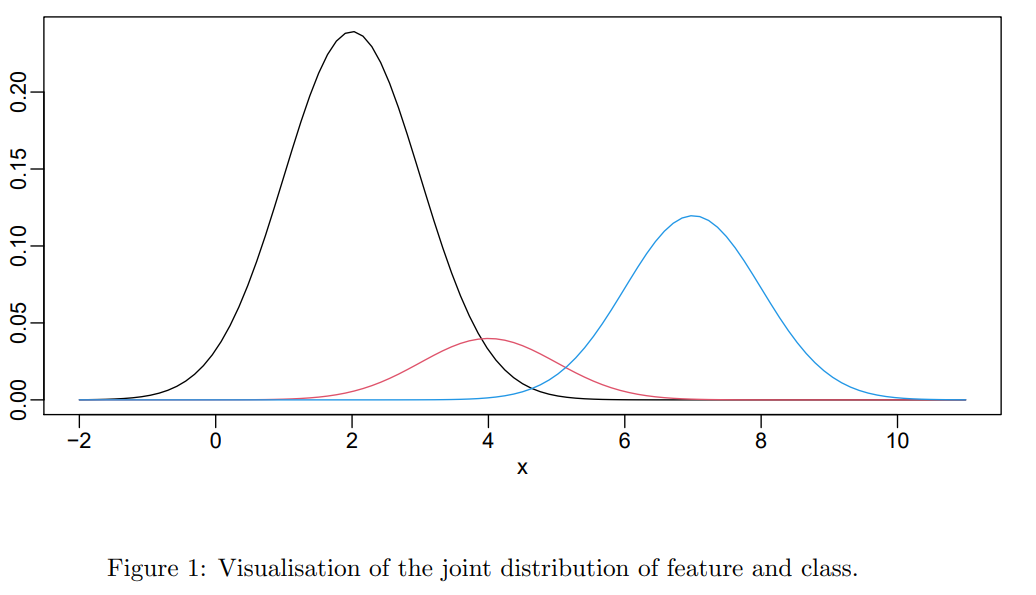  

a. Sketch on Figure 1 the decision regions for Bayes classifier.  
  
b. How many different misclassification errors can be made for this classification problem?  
  
c. For each possible error type, sketch on Figure 1 the area that represents the probability of making
this error.  
  
d. Derive the exact decision boundaries for Bayes classifier. Hint: use the discriminant functions for
LDA, as obtained in Exercise 1 from reducing (1).  

e. Compute the probabilities from c). Hint: the Gaussian cumulative distribution function implements
the integral under a Gaussian density function.  

f. Compute the exact expected loss for the Bayes classifier.  

g. Simulate 1000 observations from the model and split into a training dataset with 600 observations
and a test set with 400 observations.  

h. Train the classifier on the simulated data. This involves both finding the parameter estimates and
computing the linear discriminant functions.  

i. Use the trained classifier to classify the test data and compute the confusion matrix (for each possible
combination of true class and predicted class, how big a proportion of the 400 test data points end
up in this combination?) and also the total misclassification error. Compare to the exact errors you
got in e) and the Bayes error (misclassification error for the Bayes classifier) from f).  

j. Imagine we knew the relevant class probabilities (0.6, 0.1, 0.3) and could specify them directly in the
LDA discriminant function rather than having to estimating them from the training data. Argue
why we could hope to get a better classifier by training on a balanced dataset, rather than a dataset
that is representative of the class probabilities.  


*Solution*:  
a)  
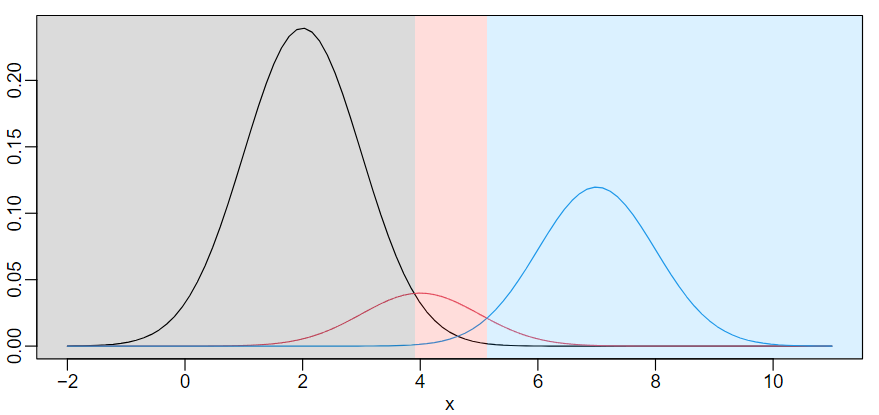 

b)  
6 different errors.  

| | | | | |
|-|-|-|-|-|
| | | True | Values
| | | Black | Red | Blue |
| Predicted | Black | ✔️ | ❌ | ❌ |
| Values | Red | ❌ | ✔️ | ❌ |
| | Blue | ❌ | ❌ | ✔️ |  
  


c) Each shaded area represents the errors of that type. E.g. red in black area is true reds predicted black.  
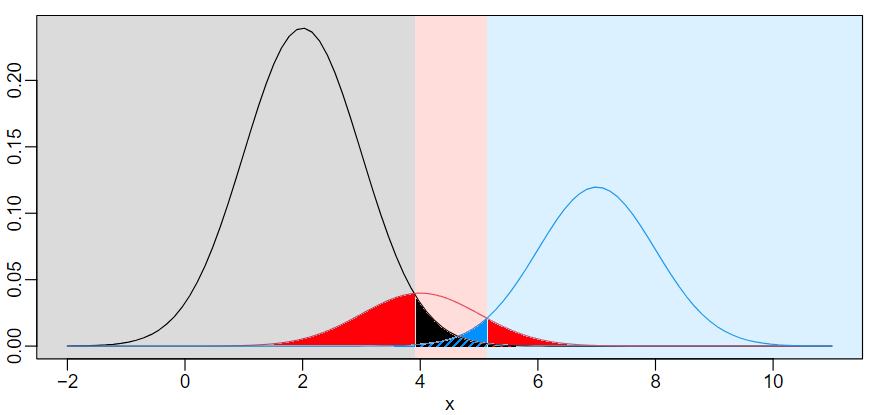

d)  
There are 3 decision boundaries. They are when $\delta_\text{black}(x)=\delta_\text{red}(x)$, when $\delta_\text{black}(x)=\delta_\text{blue}(x)$ and when $\delta_\text{red}(x)=\delta_\text{blue}(x)$. That is 3 formulas:
$$
\begin{align*}
\frac{\mu_{\text{black}}}{\sigma^{2}}x-\frac{\mu_{\text{black}}^{2}}{2\sigma^{2}}+\log\pi_{\text{black}}
&=
\frac{\mu_{\text{red}}}{\sigma^{2}}x-\frac{\mu_{\text{red}}^{2}}{2\sigma^{2}}+\log\pi_{\text{red}} \\
\frac{\mu_{\text{black}}}{\sigma^{2}}x-\frac{\mu_{\text{black}}^{2}}{2\sigma^{2}}+\log\pi_{\text{black}}
&=
\frac{\mu_{\text{blue}}}{\sigma^{2}}x-\frac{\mu_{\text{blue}}^{2}}{2\sigma^{2}}+\log\pi_{\text{blue}} \\
\frac{\mu_{\text{red}}}{\sigma^{2}}x-\frac{\mu_{\text{red}}^{2}}{2\sigma^{2}}+\log\pi_{\text{red}}
&=
\frac{\mu_{\text{blue}}}{\sigma^{2}}x-\frac{\mu_{\text{blue}}^{2}}{2\sigma^{2}}+\log\pi_{\text{blue}}
\end{align*}
$$
We know all their variances are $\sigma^2=1$ and their means $(\mu_\text{black},\mu_\text{red},\mu_\text{blue})=(2,4,1)$. Finally we know that $(\pi_{\text{black}},\pi_{\text{red}},\pi_{\text{blue}})=(0.6, 0.1, 0.3)$.  
$$
\begin{align*}
\frac{2}{1}x-\frac{2^{2}}{2}+\log0.6
&=
\frac{4}{1}x-\frac{4^{2}}{2}+\log0.1 && \text{Black vs. Red} \\
\frac{2}{1}x-\frac{2^{2}}{2}+\log0.6
&=
\frac{7}{1}x-\frac{7^{2}}{2}+\log0.3 && \text{Black vs. Blue} \\
\frac{4}{1}x-\frac{4^{2}}{2}+\log0.1
&=
\frac{7}{1}x-\frac{7^{2}}{2}+\log0.3 && \text{Red vs. Blue} \\
\Longleftrightarrow \\
2x-2.221849
&=
4x-9 && \text{Black vs. Red} \\
2x-2.221849
&=
7x-25.022879 && \text{Black vs. Blue} \\
4x-9
&=
7x-25.022879 && \text{Red vs. Blue} \\
\Longleftrightarrow \\
x&=3.389075 && \text{Black vs. Red} \\
x&=4.560206 && \text{Black vs. Blue} \\
x&=5.34096 && \text{Red vs. Blue} \\
\end{align*}
$$
And if we look at the graph, they match pretty well. Of note is the black vs. blue boundary that falls right in the middle of the red region.

In [174]:
# e)
from scipy.stats import norm

black_red = 3.389075
red_blue = 5.34096
bla_mu, r_mu, blu_mu = 2, 4, 7
true_red_pred_black = norm.cdf(black_red, r_mu, 1) # Red area classified as black
true_blue_pred_black = norm.cdf(black_red, blu_mu, 1)
true_black_pred_black = norm.cdf(black_red, bla_mu, 1)

true_black_pred_red = norm.cdf(red_blue, bla_mu, 1) - true_black_pred_black # black area under red and left of - black area left of red = black area under red
true_blue_pred_red = norm.cdf(red_blue, blu_mu, 1) - true_blue_pred_black
true_red_pred_red = norm.cdf(red_blue, r_mu, 1) - true_red_pred_black

true_black_pred_blue = 1 - norm.cdf(red_blue, bla_mu, 1) # all of black (1) - black not in blue area
true_red_pred_blue = 1 - norm.cdf(red_blue, r_mu, 1)
true_blue_pred_blue = 1 - norm.cdf(red_blue, blu_mu, 1)

total_probability = ( # dont know why i have to do this, i probably fucked something up
    true_red_pred_black +
    true_blue_pred_black +
    true_black_pred_black +
    true_black_pred_red +
    true_blue_pred_red +
    true_red_pred_red +
    true_black_pred_blue +
    true_red_pred_blue +
    true_blue_pred_blue
)

print(
    f"Confusion Matrix (Bayes classifier):\n" +
    f"                        True Values\n" +
    f"                   | Black |  Red  | Blue  |\n" +
    f" Predicted | Black | {(true_black_pred_black / total_probability) *100:1.1f}% | {(true_red_pred_black / total_probability) *100:1.1f}% | {(true_blue_pred_black / total_probability) *100:1.1f}%  |\n" +
    f"  Values   |  Red  | {(true_black_pred_red / total_probability) *100:1.1f}%  | {(true_red_pred_red / total_probability) *100:1.1f}% | {(true_blue_pred_red / total_probability) *100:1.1f}%  |\n" +
    f"           | Blue  | {(true_black_pred_blue / total_probability) *100:1.1f}%  | {(true_red_pred_blue / total_probability) *100:1.1f}%  | {(true_blue_pred_blue / total_probability) *100:1.1f}% |"
)

Confusion Matrix (Bayes classifier):
                        True Values
                   | Black |  Red  | Blue  |
 Predicted | Black | 30.6% | 9.0% | 0.0%  |
  Values   |  Red  | 2.7%  | 21.3% | 1.6%  |
           | Blue  | 0.0%  | 3.0%  | 31.7% |


In [175]:
# f)
correct = true_black_pred_black + true_red_pred_red + true_blue_pred_blue
incorrect = (
    true_red_pred_black +
    true_blue_pred_black +
    true_black_pred_red +
    true_blue_pred_red +
    true_black_pred_blue +
    true_red_pred_blue
)

error = incorrect / (correct + incorrect)
print(f"The epected loss is {error*100:1.1f}%")

The epected loss is 16.4%


In [176]:
# g)
import numpy as np
def observe(n: int): # not very efficient but who cares
    # determine what class we observe
    classes = [0, 1, 2] # black, red, blue
    probs = [0.6, 0.1, 0.3]
    draw = np.random.choice(
        classes,
        size=n,
        p=probs
    )
    def resfunc(k):
        if k == 0:
            return norm.rvs(bla_mu, 1)
        if k == 1:
            return norm.rvs(r_mu, 1)
        if k == 2:
            return norm.rvs(blu_mu, 1)
    
    vfunc = np.vectorize(resfunc)
    return np.c_[vfunc(draw), draw]

train_size, test_size = 600, 400
observations = observe(train_size + test_size)
train = observations[:train_size]
test = observations[train_size:train_size+test_size]
print(train[:10])

[[6.04501913 2.        ]
 [6.3543981  2.        ]
 [6.16838357 2.        ]
 [6.26542991 2.        ]
 [1.60913562 0.        ]
 [6.93108123 2.        ]
 [0.85680654 0.        ]
 [2.84821427 1.        ]
 [2.5408192  0.        ]
 [7.64295758 2.        ]]


In [177]:
# h)
def delta(X, mu_k, pi_k, sigma_sq):
    return X * (mu_k / (sigma_sq)) - ((mu_k ** 2) / 2 * (sigma_sq)) + np.log(pi_k)
def predict(X, Mu, Pi, sigma_sq):
    if len(Mu) != len(Pi):
        raise ValueError(f"Length of Mu and Pi must be equal, got {len(Mu)} and {len(Pi)}")
    probas = []
    for k in range(len(Mu)):
        mu_k = Mu[k]
        pi_k = Pi[k]
        probas.append(delta(X, mu_k, pi_k, sigma_sq))
    return np.argmax(probas, axis=0)
    # return np.array(probas)

def estimate_mu_k(k, data):
    X_k = data[data[:,1] == k][:,0] # get all training data with class k
    return np.sum(X_k) / len(X_k)
def estimate_sigma_sq(data, Mu):
    # Get unique classes
    classes = np.unique(data[:,1])
    tot = 0
    for k in classes:
        mu_k = Mu[k.astype(int)]
        X_k = data[data[:,1] == k][:,0]
        tot += np.sum((X_k - mu_k) ** 2)
    return tot / (len(data) - len(classes))
def estimate_pi_k(k, data):
    X_k = data[data[:,1] == k][:,0]
    return len(X_k) / len(data)

classes = [0, 1, 2]
Mu = [estimate_mu_k(k, train) for k in classes]
Pi = [estimate_pi_k(k, train) for k in classes]
sigma_sq = estimate_sigma_sq(train, Mu)
print(f"Parameter predictions:\nMu: {Mu}\nPi: {Pi}\nSigma^2: {sigma_sq}")
# Pretty close to the true values
# "computing the linear discriminant function" probably means you have to do this by hand but fuck that.

Parameter predictions:
Mu: [1.9811293597245394, 3.9128533005581296, 6.96833459089511]
Pi: [0.5983333333333334, 0.08166666666666667, 0.32]
Sigma^2: 0.8855505299779395


In [178]:
# i)
y = test[:,1]
y_pred = predict(test[:,0], Mu, Pi, sigma_sq)

def print_confusion_matrix(y, y_pred):
    # true_predicted
    bla_bla = np.sum(y_pred[y == 0] == 0)
    bla_red = np.sum(y_pred[y == 0] == 1)
    bla_blu = np.sum(y_pred[y == 0] == 2)
    red_bla = np.sum(y_pred[y == 1] == 0)
    red_red = np.sum(y_pred[y == 1] == 1)
    red_blu = np.sum(y_pred[y == 1] == 2)
    blu_bla = np.sum(y_pred[y == 2] == 0)
    blu_red = np.sum(y_pred[y == 2] == 1)
    blu_blu = np.sum(y_pred[y == 2] == 2)

    bla_bla_norm = np.sum(y_pred[y == 0] == 0) / len(test)
    bla_red_norm = np.sum(y_pred[y == 0] == 1) / len(test)
    bla_blu_norm = np.sum(y_pred[y == 0] == 2) / len(test)
    red_bla_norm = np.sum(y_pred[y == 1] == 0) / len(test)
    red_red_norm = np.sum(y_pred[y == 1] == 1) / len(test)
    red_blu_norm = np.sum(y_pred[y == 1] == 2) / len(test)
    blu_bla_norm = np.sum(y_pred[y == 2] == 0) / len(test)
    blu_red_norm = np.sum(y_pred[y == 2] == 1) / len(test)
    blu_blu_norm = np.sum(y_pred[y == 2] == 2) / len(test)

    tru_bla = bla_bla + bla_red + bla_blu
    tru_red = red_bla + red_red + red_blu
    tru_blu = blu_bla + blu_red + blu_blu

    pre_bla = bla_bla + red_bla + blu_bla
    pre_red = bla_red + red_red + blu_red
    pre_blu = bla_blu + red_blu + blu_blu

    correct = bla_bla + red_red + blu_blu
    incorrect = bla_red + bla_blu + red_bla + red_blu + blu_bla + blu_red
    error = incorrect / (correct + incorrect)

    print(
        f"Confusion Matrix:\n" +
        f"                                     True Values\n" +
        f"                         | Black ({tru_bla}) | Red ({tru_red})  | Blue ({tru_blu})  |\n" +
        f" Predicted | Black ({pre_bla}) | {bla_bla_norm*100:1.1f}% ({bla_bla}) | {red_bla_norm*100:1.1f}% ({red_bla})  | {blu_bla_norm*100:1.1f}% ({blu_bla})    |\n" +
        f"  Values   |  Red ({pre_red})   | {bla_red_norm*100:1.1f}% ({bla_red})   | {red_red_norm*100:1.1f}% ({red_red})  | {blu_red_norm*100:1.1f}% ({blu_red})    |\n" +
        f"           | Blue ({pre_blu})  | {bla_blu_norm*100:1.1f}% ({bla_blu})    | {red_blu_norm*100:1.1f}% ({red_blu}) | {blu_blu_norm*100:1.1f}% ({blu_blu}) |\n" +
        "\n" +
        f"Error rate: {error*100:1.1f}%"
    )
print_confusion_matrix(y, y_pred)
# We get way more black predictions than red predictions than the bayes.
# barely any true reds cause there are so few of them

Confusion Matrix:
                                     True Values
                         | Black (246) | Red (37)  | Blue (117)  |
 Predicted | Black (221) | 54.0% (216) | 1.2% (5)  | 0.0% (0)    |
  Values   |  Red (34)   | 6.0% (24)   | 2.5% (10)  | 0.0% (0)    |
           | Blue (145)  | 1.5% (6)    | 5.5% (22) | 29.2% (117) |

Error rate: 14.2%


*Solution*:  
With an unbalanced dataset, the predictions will be biased towards those with more values, even if they also have higher class priors. If we already knew the priors, having a balanced dataset would make more correct predictions in e.g. the red values.

**Exercise 3.** Now consider the QDA setup from lectures where the features were Gaussian but with each
class having its own set of parameters (mean and variance):
$$
\begin{align*}
p(x|Y = \text{black}) &= \mathcal{N}(2, 0.25) \\
p(x|Y = \text{red}) &= \mathcal{N}(4, 1) \\
p(x|Y = \text{blue}) &= \mathcal{N} 7, 0.81),
\end{align*}
$$
a) Explain why you would not expect LDA to perform well.  

b) Simulate some data from the model: A training dataset with 600 observations and a test set with
400 observations. Train both an LDA and a QDA classifier and compare their test error.

*Solution*:  
Since all classes have different variances, the assumption that they're equal is wront. This will result in a single variance being used for all of them, and thus predictions will be based on an incorrect model.

In [179]:
# b)
# Generate data
bla_mu, bla_var = 2, 0.25
red_mu, red_var = 4, 1
blu_mu, blu_var = 7, 0.81

def observe(n: int): # not very efficient but who cares
    # determine what class we observe
    classes = [0, 1, 2] # black, red, blue
    probs = [0.6, 0.1, 0.3]
    draw = np.random.choice(
        classes,
        size=n,
        p=probs
    )
    def resfunc(k):
        if k == 0:
            return norm.rvs(bla_mu, np.sqrt(bla_var))
        if k == 1:
            return norm.rvs(red_mu, np.sqrt(red_var))
        if k == 2:
            return norm.rvs(blu_mu, np.sqrt(blu_var))
    
    vfunc = np.vectorize(resfunc)
    return np.c_[vfunc(draw), draw]

train_size, test_size = 600, 400
observations = observe(train_size + test_size)
train = observations[:train_size]
test = observations[train_size:train_size+test_size]
print(train[:10])

[[1.49586819 0.        ]
 [2.17082696 0.        ]
 [6.25689078 2.        ]
 [8.15938748 2.        ]
 [1.74493351 0.        ]
 [6.83155489 2.        ]
 [6.21294888 2.        ]
 [7.55868963 2.        ]
 [1.89741671 0.        ]
 [1.76874926 0.        ]]


In [180]:
# Create models and estimates
LDA = predict
def QDA(X, Mu, Pi, Sigma_sq):
    if len(Mu) != len(Pi) or len(Mu) != len(Sigma_sq):
        raise ValueError(f"Length of Mu, Pi and Sigma_sq must be equal, got {len(Mu)}, {len(Pi)} and {len(Sigma_sq)}")
    
    def delta(X, mu_k, pi_k, sigma_sq_k):
        return (
            (-(1 / (2 * sigma_sq_k))) * (X**2) + 
            (mu_k / sigma_sq_k) * X + 
            (
                np.log(pi_k) - 
                np.log(np.sqrt(sigma_sq_k)) - 
                ((mu_k**2) / (2 * np.sqrt(sigma_sq_k)))
            )
        )

    probas = []
    for k in range(len(Mu)):
        mu_k = Mu[k]
        pi_k = Pi[k]
        probas.append(delta(X, mu_k, pi_k, sigma_sq))
    return np.argmax(probas, axis=0)

def estimate_sigma_sq_k(k, data, mu_k):
    X_k = data[data[:,1] == k][:,0]
    return (
        (1 / (len(X_k) - 1)) *
        np.sum( (X_k-mu_k)*(X_k-mu_k).T)
    )

classes = [0, 1, 2]
Mu = [estimate_mu_k(k, train) for k in classes]
Pi = [estimate_pi_k(k, train) for k in classes]
sigma_sq = estimate_sigma_sq(train, Mu)
Sigma_sq = [estimate_sigma_sq_k(k, train, Mu[k]) for k in classes]
print(f"Sigma^2: {Sigma_sq}")
# Pretty close to the true variances

Sigma^2: [0.23404225103594622, 1.12280290382971, 0.8629271753057606]


In [181]:
y = test[:,1]
y_lda = LDA(test[:,0], Mu, Pi, sigma_sq)
y_qda = QDA(test[:,0], Mu, Pi, Sigma_sq)

print_confusion_matrix(y, y_lda)
print_confusion_matrix(y, y_qda)
# qda winning so hard

Confusion Matrix:
                                     True Values
                         | Black (252) | Red (41)  | Blue (107)  |
 Predicted | Black (12) | 3.0% (12) | 0.0% (0)  | 0.0% (0)    |
  Values   |  Red (0)   | 0.0% (0)   | 0.0% (0)  | 0.0% (0)    |
           | Blue (388)  | 60.0% (240)    | 10.2% (41) | 26.8% (107) |

Error rate: 70.2%
Confusion Matrix:
                                     True Values
                         | Black (252) | Red (41)  | Blue (107)  |
 Predicted | Black (234) | 57.8% (231) | 0.8% (3)  | 0.0% (0)    |
  Values   |  Red (31)   | 5.2% (21)   | 2.5% (10)  | 0.0% (0)    |
           | Blue (135)  | 0.0% (0)    | 7.0% (28) | 26.8% (107) |

Error rate: 13.0%
